## Numpy array sampling
We're going to look at some examples of 1D and 2D arrays in numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

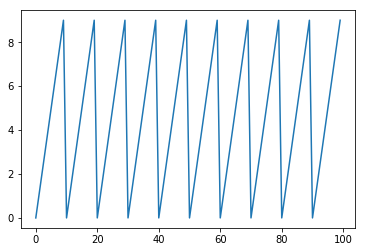

In [2]:
x = np.mod(np.arange(100), 10)
plt.plot(x)

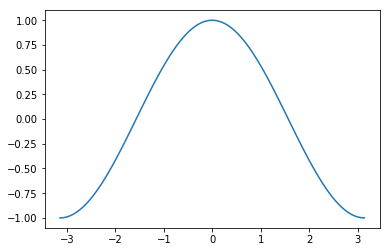

In [3]:
x = np.linspace(-np.pi, np.pi, 95)
y = np.cos(x)
plt.plot(x, y)

In [4]:
x = np.zeros(10)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 2. 0.]]


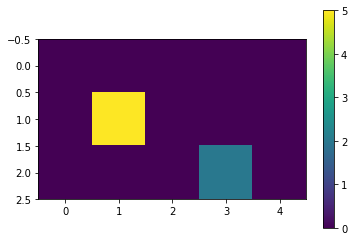

In [5]:
x = np.zeros((3, 5))
x[1, 1] = 5
x[2, 3] = 2
print(x)
plt.imshow(x)
plt.colorbar()

Text(0.5,1,'Tangent')

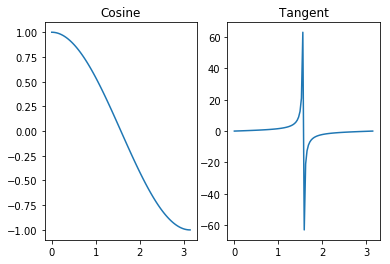

In [6]:
## How to make more than one plot
t = np.linspace(0, np.pi, 100)
plt.subplot(1, 2, 1)
plt.plot(t, np.cos(t))
plt.title("Cosine")
plt.subplot(1, 2, 2)
plt.plot(t, np.tan(t))
plt.title("Tangent")

## 2D Grids, Reshaping, KDTrees

Let's say we have $N$ samples of points on a circle.  We'll setup the points so that they're in an $N \times 2$ matrix, where each row is a different point, the first column holds the x coordinate, and the second column holds the y coordinate

(-1.0465338826495765,
 1.106841261863668,
 -1.0984651287549299,
 1.0984651287549299)

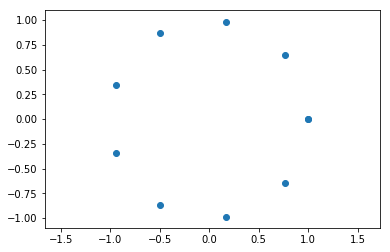

In [7]:
N = 10
t = np.linspace(0, 2*np.pi, N)
XCircle = np.zeros((N, 2))
XCircle[:, 0] = np.cos(t) # The x coordinates go along the first column
XCircle[:, 1] = np.sin(t)
plt.scatter(XCircle[:, 0], XCircle[:, 1])
plt.axis('equal')

Now, let's create a grid from $x = -2$ to $x = 2$ and $y = -2$ to $y = 2$ at a resolution of 80 along each dimension (for 3600 grid points total), which will definitely cover the unit circle

Text(0.5,1,'Y Coordinates on Grid')

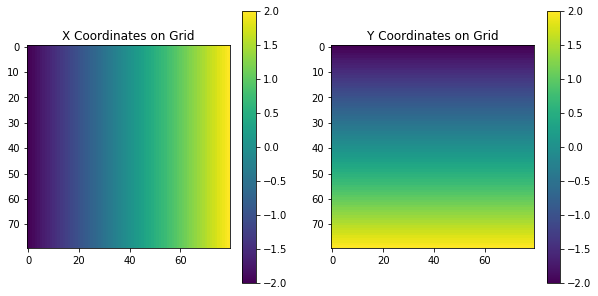

In [8]:
res = 80
xpix = np.linspace(-2, 2, res)
ypix = np.linspace(-2, 2, res)
X, Y = np.meshgrid(xpix, ypix)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(X)
plt.colorbar()
plt.title("X Coordinates on Grid")
plt.subplot(122)
plt.imshow(Y)
plt.colorbar()
plt.title("Y Coordinates on Grid")

We can reshape the points on the grid so that they are in a 6400 x 2 matrix, where each row holds the coordinates.  For this, we use the *flatten*, command, which takes out values in a 2D array and arranges them in "raster order," which is from left to right, and top to bottom

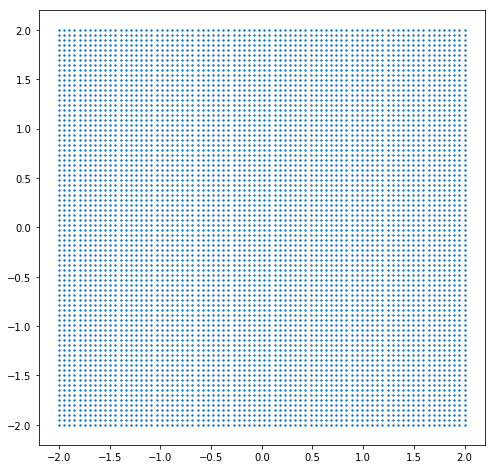

In [9]:
XGrid = np.zeros((X.size, 2))
XGrid[:, 0] = X.flatten()
XGrid[:, 1] = Y.flatten()
plt.figure(figsize=(8, 8))
plt.scatter(XGrid[:, 0], XGrid[:, 1], 2) # 2 is the size of the points to draw

Now let's say that for each grid point, we want to find the closest point on the circle and its distance away.  For this, we should use a KD tree for more efficient nearest neighbor search.  

More documentation can be found here:
https://scikit-learn.org/stable/modules/neighbors.html

In [10]:
from sklearn.neighbors import KDTree
tree = KDTree(XCircle)
distances, indices = tree.query(XGrid, k=1)
print(distances.shape)
print(indices.shape)

(6400, 1)
(6400, 1)


The KD tree returns both the distance and the index of the closest point on the circle to the grid point.  We can color the grid points by both of these.  In the left plot, we see that grid points that are near the boundary of the circle have a distance near zero, and grid points towards the center of the circle or far outside the circle have a larger distance.  On the right plot, we see that the index of the nearest neighbors depends on where we are on the grid.  The point at index 0 has an angle of 0 radians, the point at index 50 has an angle of $\pi$ radians, and the point at index 100 has an angle of $2 \pi$ radians, for example

Text(0.5,1,'Indices of closest point on circle')

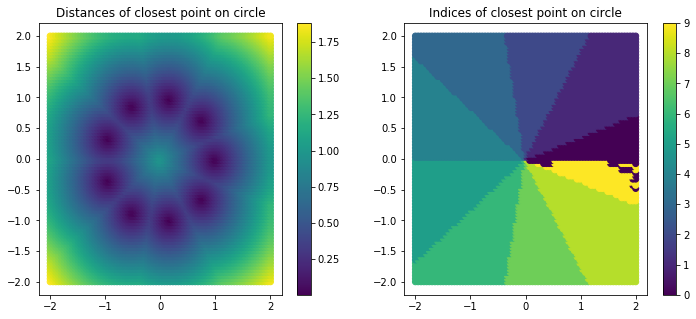

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(XGrid[:, 0], XGrid[:, 1], c=distances.flatten())
plt.colorbar()
plt.title("Distances of closest point on circle")
plt.subplot(122)
plt.scatter(XGrid[:, 0], XGrid[:, 1], c=indices.flatten())
plt.colorbar()
plt.title("Indices of closest point on circle")

We can take the distances and "reshape" them into a 2D array with the same dimensions as the grid.  This way, we finally end up with what's called a *Euclidean Distance Image*.  Your job will be to do something similar, but instead to create a *signed distance image*, where, depending on the normal, you create a signed distance to the nearest point using the normal at that point.   You will also have a weight image that keeps track of the scans taken so far and helps you figure out how much to weight the new scan that's coming in

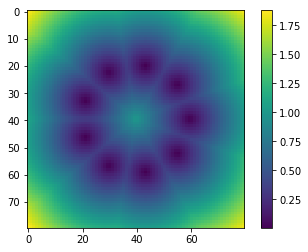

In [12]:
EuclidDistImage = np.reshape(distances, (res, res))
plt.imshow(EuclidDistImage)
plt.colorbar()

## Other Numpy Stuff (Broadcasting, etc)

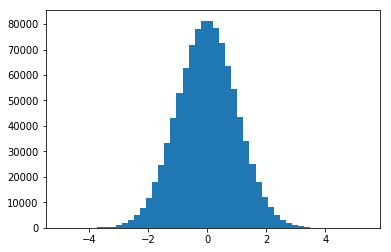

In [5]:
plt.hist(np.random.randn(1000000), bins=50)
plt.title("Random Normal Distribution")
plt.show()

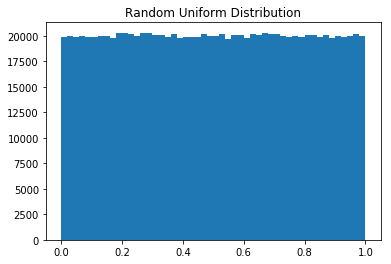

In [6]:
plt.hist(np.random.rand(1000000), bins=50)
plt.title("Random Uniform Distribution")
plt.show()

In [27]:
np.random.seed(0)
x = np.random.randn(10, 2)
x[1, 1] = np.inf
d = 1.0*np.arange(10)
d[2] = np.inf
d[5] = np.inf
d[7] = np.inf
y = x*d[:, None]
print(np.isfinite(d))
print(y)
y = y[np.isfinite(d), :]
print(y)

[ True  True False  True  True False  True False  True  True]
[[ 0.          0.        ]
 [ 0.97873798         inf]
 [        inf        -inf]
 [ 2.85026525 -0.45407162]
 [-0.41287541  1.64239401]
 [        inf         inf]
 [ 4.56622635  0.7300501 ]
 [        inf         inf]
 [11.95263259 -1.64126611]
 [ 2.81760931 -7.68686165]]
[[ 0.          0.        ]
 [ 0.97873798         inf]
 [ 2.85026525 -0.45407162]
 [-0.41287541  1.64239401]
 [ 4.56622635  0.7300501 ]
 [11.95263259 -1.64126611]
 [ 2.81760931 -7.68686165]]


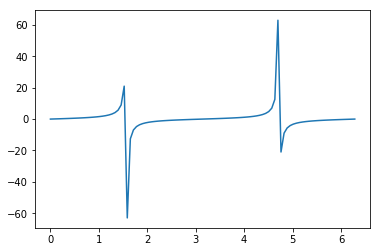

In [15]:
thetas = np.linspace(0, 2*np.pi, 100)
plt.plot(thetas, np.tan(thetas))

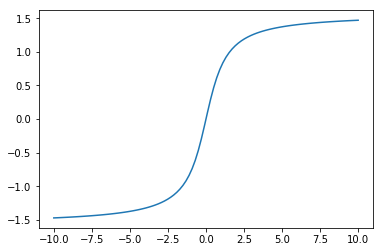

In [17]:
x = np.linspace(-10, 10, 100)
plt.plot(x, np.arctan(x))

In [18]:
np.inf*10

inf

In [21]:
np.inf*np.ones(10)

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [28]:
np.inf/np.inf

nan

In [29]:
V = np.zeros((10, 2))
x = np.array([1, 5])
V[0, :] = x
print(V)

[[1. 5.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [30]:
V[0]

array([1., 5.])

In [35]:
np.random.seed(0)
X = np.round(np.random.randn(10, 2)*100)
indices = np.mod(np.arange(20), X.shape[0])
print(indices)
Y = X[indices, :]
print(X)
print(Y)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[[176.  40.]
 [ 98. 224.]
 [187. -98.]
 [ 95. -15.]
 [-10.  41.]
 [ 14. 145.]
 [ 76.  12.]
 [ 44.  33.]
 [149. -21.]
 [ 31. -85.]]
[[176.  40.]
 [ 98. 224.]
 [187. -98.]
 [ 95. -15.]
 [-10.  41.]
 [ 14. 145.]
 [ 76.  12.]
 [ 44.  33.]
 [149. -21.]
 [ 31. -85.]
 [176.  40.]
 [ 98. 224.]
 [187. -98.]
 [ 95. -15.]
 [-10.  41.]
 [ 14. 145.]
 [ 76.  12.]
 [ 44.  33.]
 [149. -21.]
 [ 31. -85.]]


In [37]:
X*X

array([[30976.,  1600.],
       [ 9604., 50176.],
       [34969.,  9604.],
       [ 9025.,   225.],
       [  100.,  1681.],
       [  196., 21025.],
       [ 5776.,   144.],
       [ 1936.,  1089.],
       [22201.,   441.],
       [  961.,  7225.]])